In [25]:
using Random
using SSM
using Distributions
using Plots

In [27]:
# generate data from a "switching gaussian regression"
n = 5000

A = [0.99 0.01; 0.01 0.99]
β₁ = exp.(LinRange(-10, 0, 50)) ./ (sum(exp.(LinRange(-10, 0, 50)) * mean(diff(LinRange(-10, 0, 50)))))
β₂ = exp.(LinRange(-4, 0, 50)) ./ (sum(exp.(LinRange(-4, 0, 50)) * mean(diff(LinRange(-4, 0, 50)))))
σ²₁, σ²₂ = 1.0, 1.0

x = cat(zeros(50), randn(n, 1), dims=1);


In [28]:
sum(exp.(LinRange(-4, 0, 50)) * mean(diff(LinRange(-4, 0, 50))))

1.0237933572551607

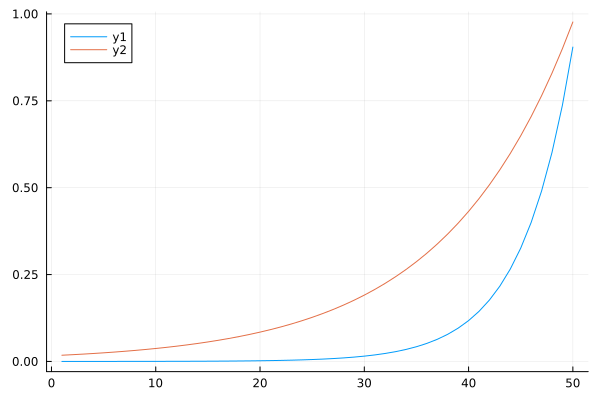

In [29]:
plot(β₁)
plot!(β₂)

In [30]:
X = permutedims(hcat([x[i:i+50-1] for i in 1:n]...), (2,1));

In [31]:
Y = zeros(n)
S = zeros(Int, 2, n)

for i in 1:n

    if i == 1
        p = rand(Bernoulli(0.5));
    else
        p = rand(Bernoulli((A * S[:, i-1])[1]))
    end

    S[1, i] = p
    S[2, i] = 1 - p

    if S[1, i] == 1
        Y[i] = X[i, :]'*β₁ + rand(Normal(0, sqrt(σ²₁)))
    else
        Y[i] = X[i, :]'*β₂ + rand(Normal(0, sqrt(σ²₂)))
    end
end

In [32]:
sum(S[2,:])

2751

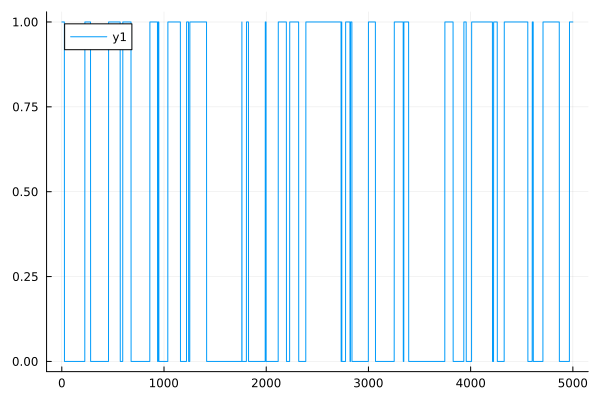

In [33]:
plot(S[1,:])

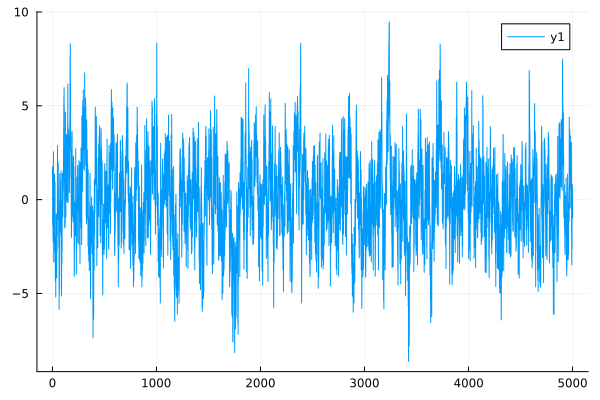

In [34]:
plot(Y)

In [35]:
model = SwitchingGaussianRegression(;K=2, λ=1e0)

SwitchingGaussianRegression{Float64}([0.32188483568769477 0.6781151643123051; 0.606417622474661 0.39358237752533903], RegressionEmissions[RegressionEmissions(GaussianRegression(Float64[], 0.0, true, 1.0)), RegressionEmissions(GaussianRegression(Float64[], 0.0, true, 1.0))], [0.8016216162610744, 0.1983783837389256], 2, 1.0)

In [36]:
ll = SSM.fit!(model, X, Y, 2000, 1e-6, true);

Log-Likelihood at iter 1: -34590.04968512181
Log-Likelihood at iter 2: -8028.425686156055
Log-Likelihood at iter 3: -7930.6276602586895
Log-Likelihood at iter 4: -7919.397415014599
Log-Likelihood at iter 5: -7909.703003532521
Log-Likelihood at iter 6: -7899.858404604172
Log-Likelihood at iter 7: -7888.810133380316
Log-Likelihood at iter 8: -7875.305992985683
Log-Likelihood at iter 9: -7857.720425689175
Log-Likelihood at iter 10: -7834.041424882701
Log-Likelihood at iter 11: -7802.31892455582
Log-Likelihood at iter 12: -7761.504465664826
Log-Likelihood at iter 13: -7712.533816021058
Log-Likelihood at iter 14: -7658.982255336622
Log-Likelihood at iter 15: -7605.426564169793
Log-Likelihood at iter 16: -7555.167680214629
Log-Likelihood at iter 17: -7509.622318151768
Log-Likelihood at iter 18: -7468.825011721201
Log-Likelihood at iter 19: -7432.055672866519
Log-Likelihood at iter 20: -7398.431950469822
Log-Likelihood at iter 21: -7367.326737194595
Log-Likelihood at iter 22: -7338.5061241107

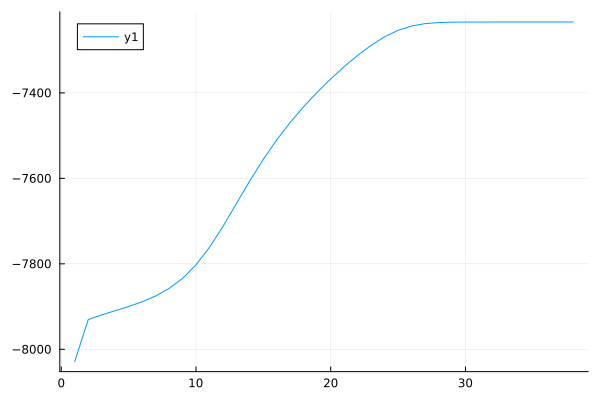

In [37]:
plot(ll[3:end])

In [38]:
model.πₖ

2-element Vector{Float64}:
 2.9296740410672477e-21
 1.0

In [39]:
γ,  = SSM.E_step(model, X, Y)

([-50.37775825940025 0.0; -7.901130682839721 -0.00037039317066955846; … ; -1.3140199388399196 -0.31298288704238075; -1.3010417160021461 -0.31779500329867005], [-50.62735879173306 -7.901130682839721; -8.22262278436483 -8.192172967516854; … ; -1.3383884913591828 -5.040641281603712; -1.32551677763513 -5.023354859792562;;; -51.887857530595284 -0.00037039317066955846; -9.19235619117353 -0.0006473457942774985; … ; -5.776237871477861 -0.31723163319111336; -5.78544601971771 -0.3220250733438661], [-49.66318749427932 -2.4580679404197623; -7.895684287022932 -3.3863430252089524; … ; -7234.2223911386345 -7233.441337775826; -7235.444416814755 -7234.461170102051], [-7234.857945864354 -7231.685307158814; -7234.1488214950505 -7230.757402467196; … ; -1.2350038989588206 -1.0150202099701235; 0.0 0.0])

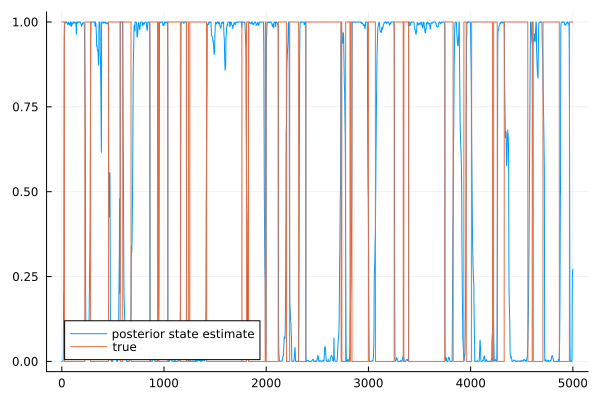

In [40]:
plot(exp.(γ)[:,1], label="posterior state estimate")
plot!(S[1,:], label="true")

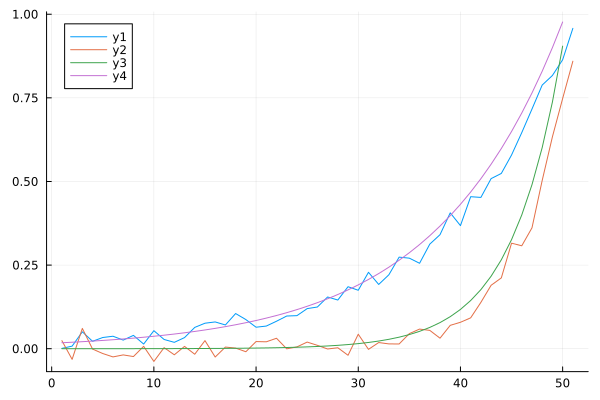

In [41]:
plot(model.B[1].regression.β)
plot!(model.B[2].regression.β)
plot!(β₁)
plot!(β₂)

In [42]:
model.A

2×2 Matrix{Float64}:
 0.990847   0.009153
 0.0112421  0.988758